In [1]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.

# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv("C:/Users/dell/Downloads/Amazon_Electronics_Products_Sales/electronics.csv")

# list of first five rows

dataset.head(5)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [2]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [3]:
dataset.shape

(1292954, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [5]:
# We can also see that there are no null values in the dataset.

# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [6]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['brand'] = dataset['brand'].astype(str)
dataset['category']=dataset['category'].astype(str)


In [7]:
# We can convert it to a timestamp using the following code:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])



In [8]:
# We can convert it to a float using the following code:
dataset['rating'] = dataset['rating'].astype(float)

In [9]:
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)

In [10]:
dataset.describe()


,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [11]:
# the statistical summary of the dataset gives us the following information:

# 1. The mean rating is 4.

# 2. The minimum rating is 1.

# 3. The maximum rating is 5.

# 4. The standard deviation of the ratings is 1.4.

# 5. The 25th percentile of the ratings is 4.

# 6. The 50th percentile of the ratings is 5.

# 7. The 75th percentile of the ratings is 5.

In [12]:
#the number of unique users and items in the dataset
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [13]:
#checking for duplicates
dataset.duplicated().sum()

0

In [14]:
#checking for missing values
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [15]:
#the distribution of ratings
dataset['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [16]:
#most of the ratings are 5 


In [17]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

In [18]:
#according to the analysis 2015 was the best year of sales 

In [19]:
# what was the best month of sales
dataset['month']=pd.DatetimeIndex(dataset['timestamp']).month
dataset['month'].value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

In [20]:
# January was the best month of sales

In [21]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

In [22]:
dataset.nunique()

item_id         8188
user_id       132393
rating             5
timestamp       4552
model_attr         3
category          10
brand             51
year              20
user_attr          2
split              3
month             12
dtype: int64

# Finding Ansers with DATA WE HAVE with visualizations 


<Axes: xlabel='rating', ylabel='count'>

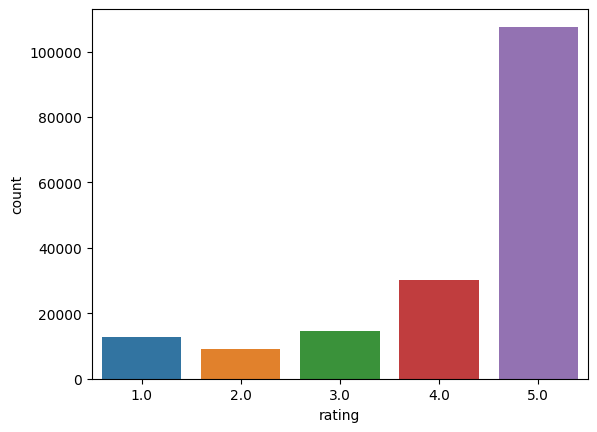

In [23]:
#the distribution of ratings 
sns.countplot(x='rating',data=dataset)

In [24]:
# the distribution of ratings

# The distribution of ratings is as follows:

# most of the ratings are 5

dataset['rating'].value_counts()

5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: rating, dtype: int64

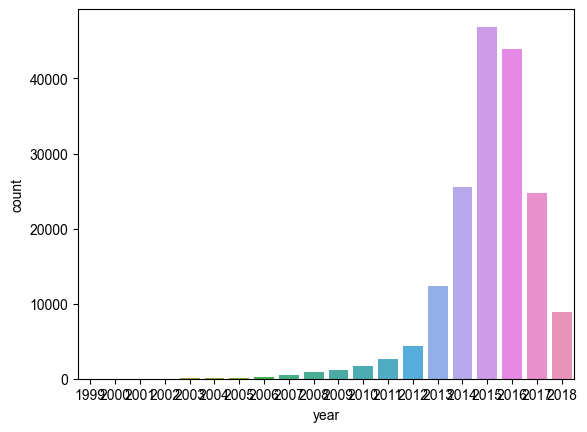

In [25]:
#distribution of sales by year 
sns.countplot(x='year',data=dataset)

#setting global figure size 
sns.set(rc={'figure.figsize':(14,10)})

In [26]:
#according to the visualization 
#2015 was the best year for sale 


<Axes: xlabel='brand', ylabel='count'>

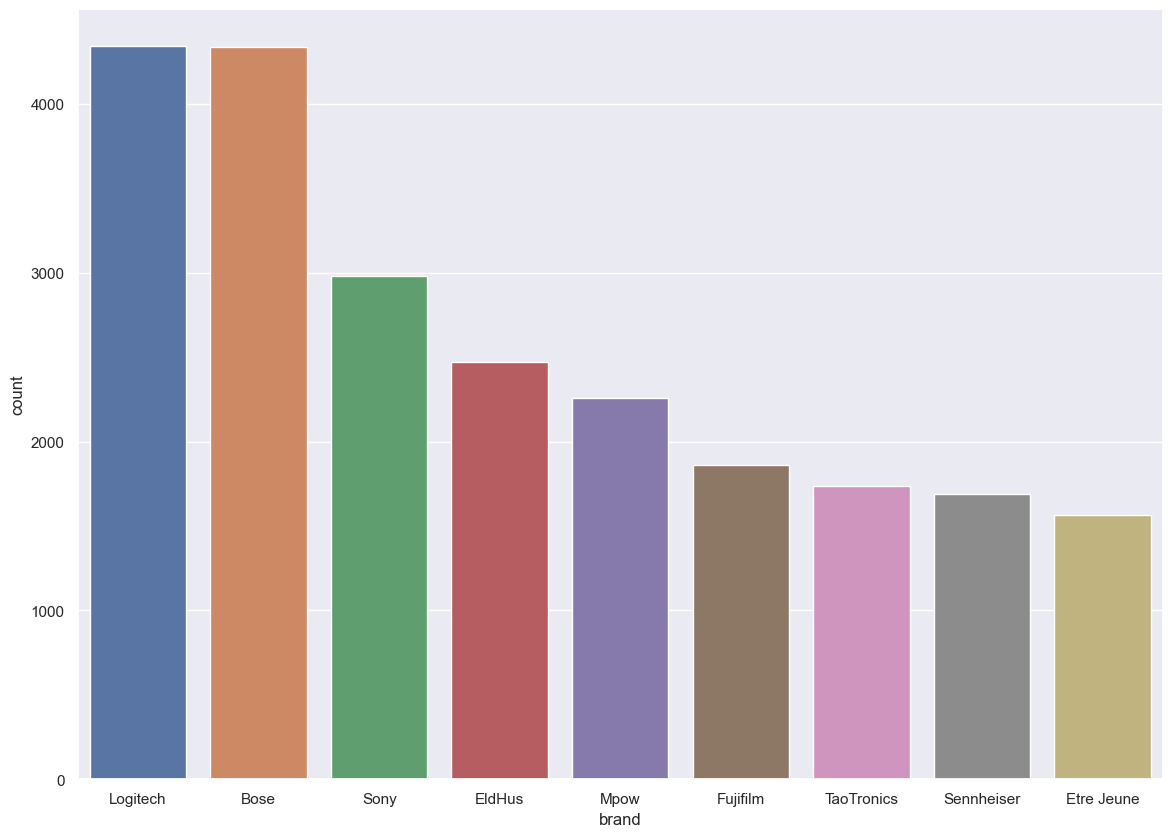

In [27]:
#brands with the most sales 
sns.countplot(x='brand',data=dataset,order=dataset['brand'].value_counts().iloc[1:10].index)

In [28]:
## Logitech & Bose had the most sales followed by Sony.

<Axes: xlabel='brand', ylabel='count'>

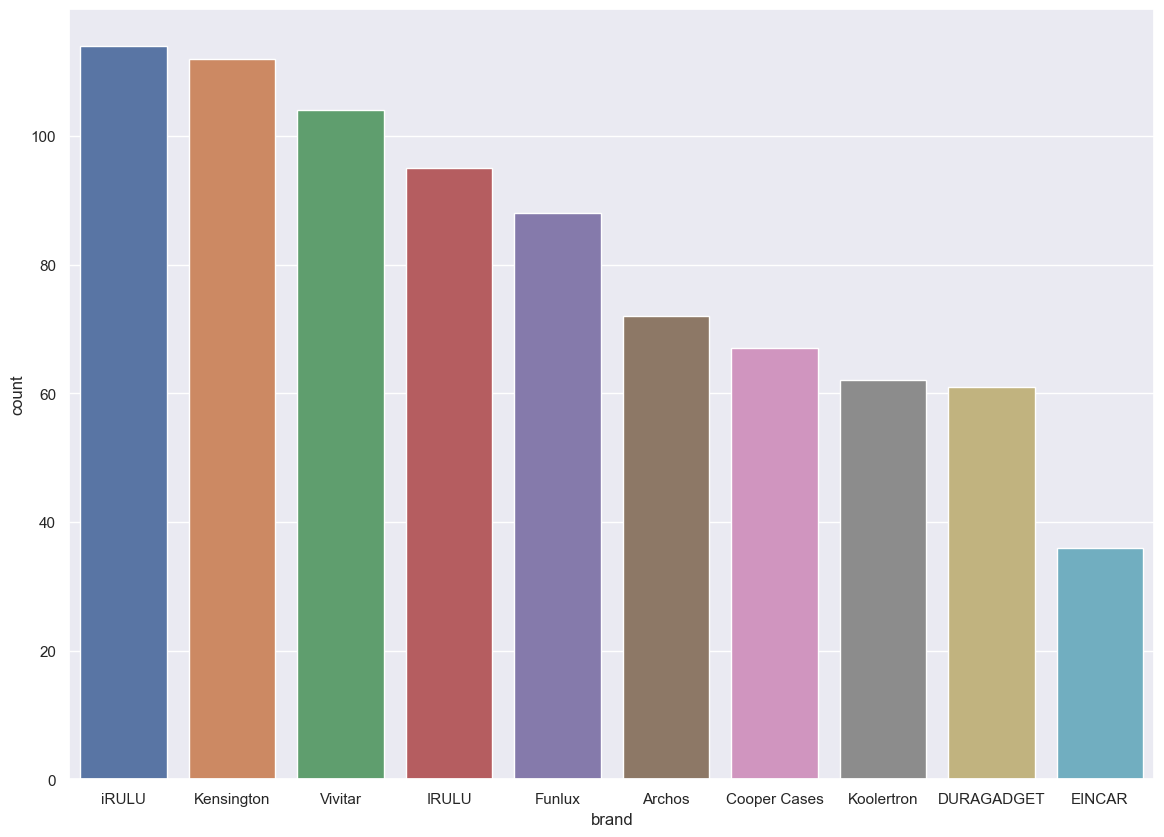

In [29]:
sns.countplot(x='brand',data=dataset,order=dataset['brand'].value_counts().iloc[-10:].index)

In [30]:
#according to this graph , EINCAR has the least sale 

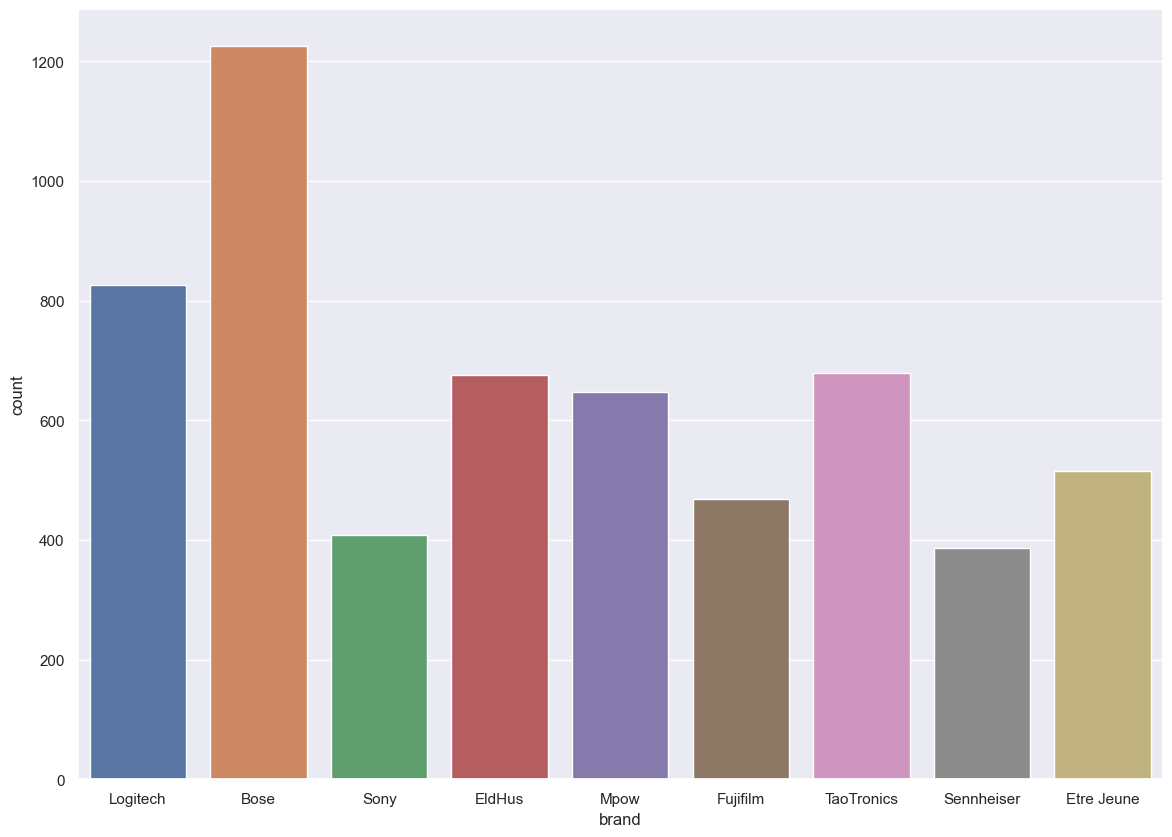

In [31]:
#brands with the most sales in 2016 
sns.countplot(x='brand',data=dataset[dataset['year']==2016],order=dataset['brand'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(14,12)})

In [32]:
# in 2016 Bose overtook Logitech to have the most sales.

#the top 3 products sold in 2016 were Bose , Logitech & TooTronics 

<Axes: xlabel='brand', ylabel='count'>

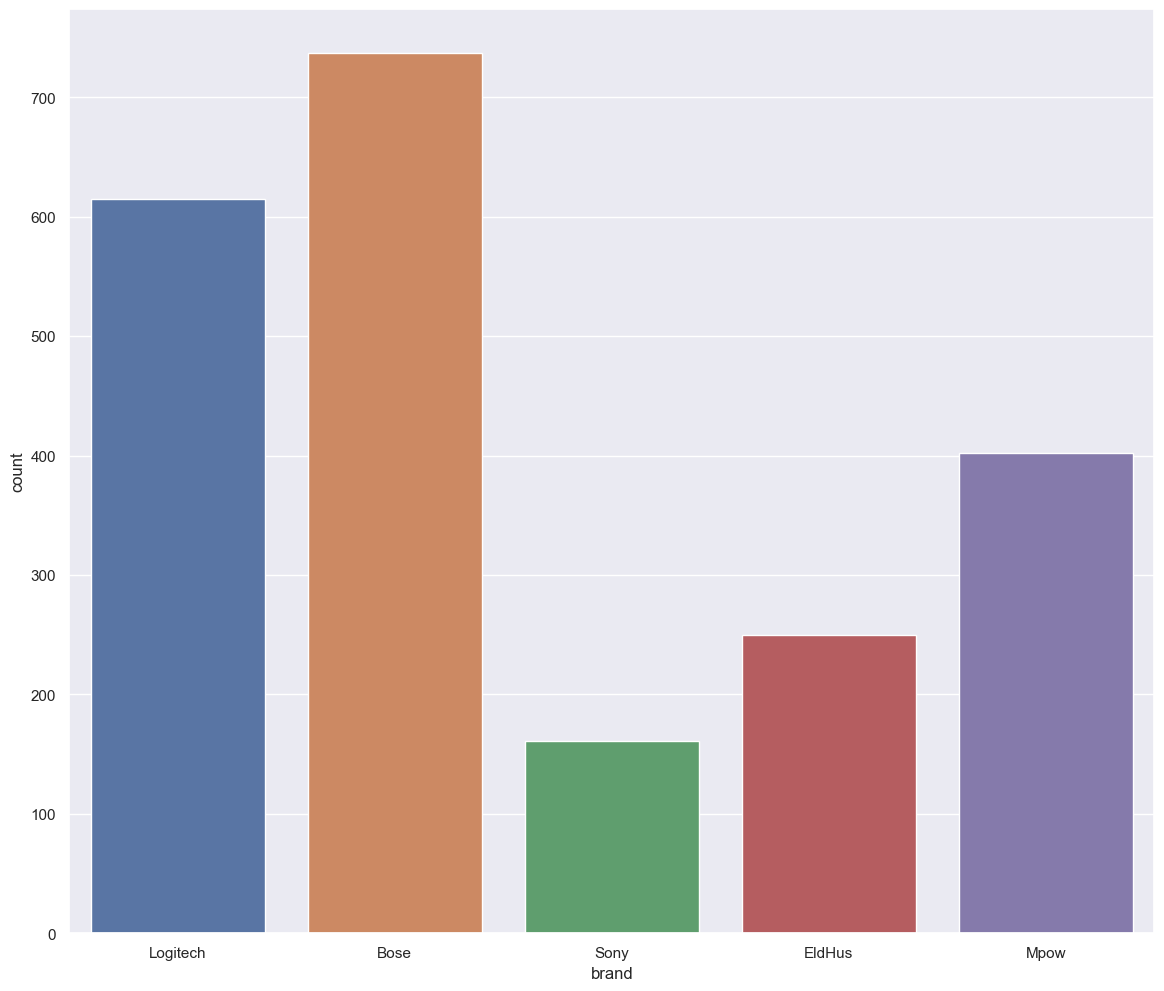

In [33]:
#brand with the most sales in 2017 
sns.countplot(x='brand',data=dataset[dataset['year']==2017],order=dataset['brand'].value_counts().iloc[1:6].index)

In [34]:
#Bose has the most sales in 2017
#top 3 Bose>Logitech>Mpow

<Axes: xlabel='brand', ylabel='count'>

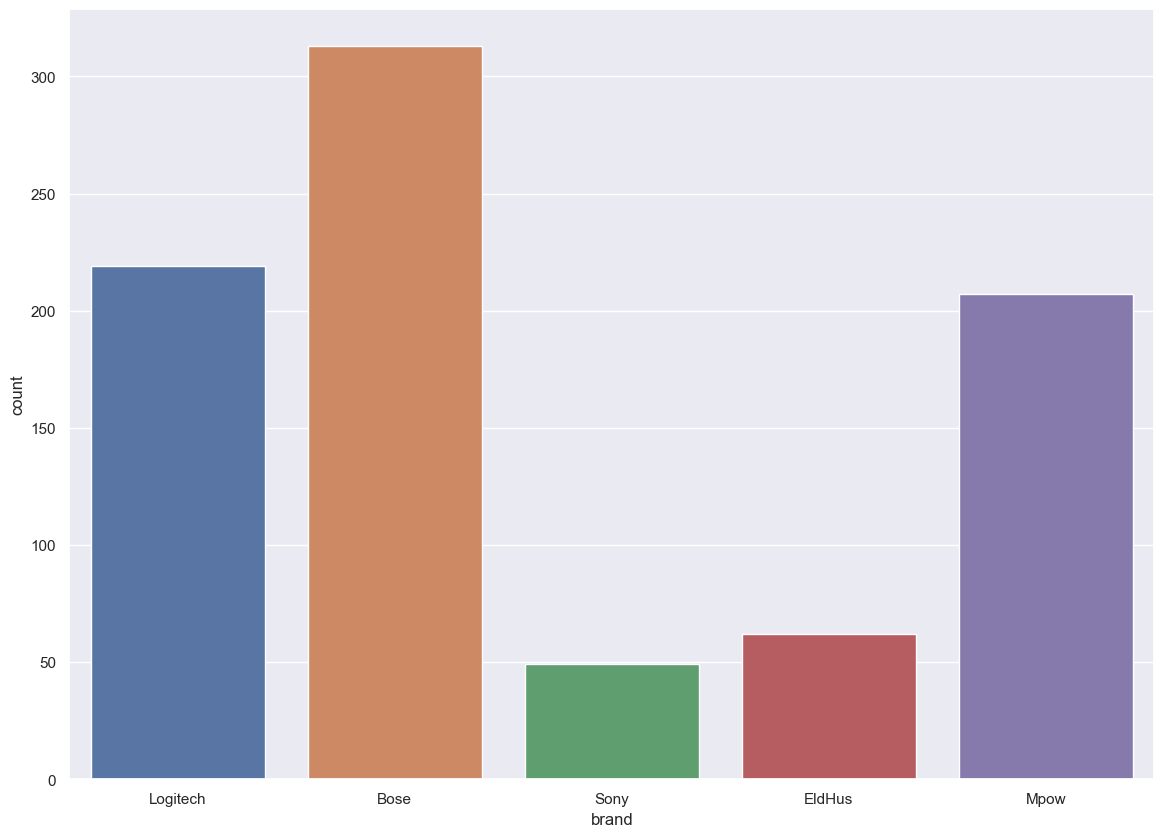

In [43]:
# brands with the most sales in 2018

sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:6].index)


In [44]:
# For 2018, Bose was the most sold for a third year in a row followed by Logitech while Mpow was the third most sold.


<Axes: xlabel='month', ylabel='count'>

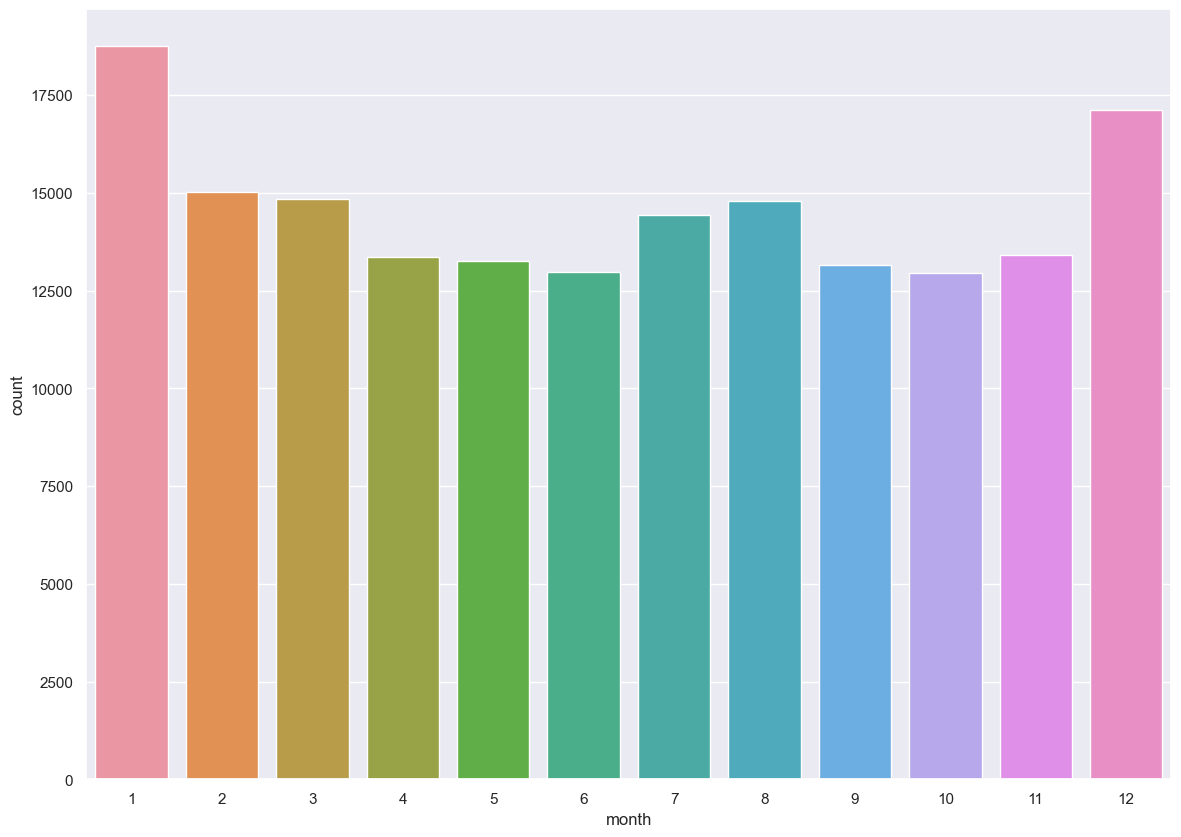

In [45]:
#month the most sale 
sns.countplot(x='month',data=dataset)

In [46]:
#January [#1] was the month with the most 

<Axes: xlabel='category', ylabel='count'>

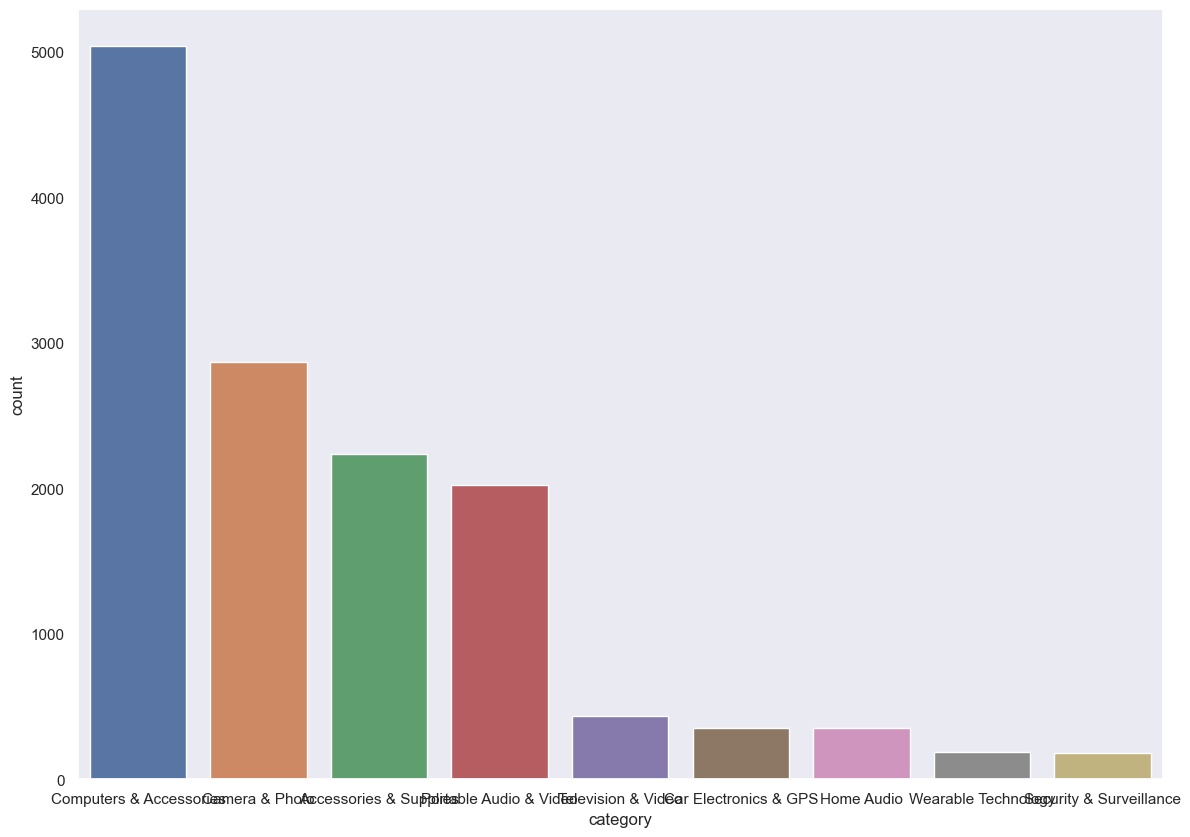

In [56]:
# What products by category were sold the most in January
sns.countplot(x='category',data=dataset[dataset['month']==1],order=dataset['category'].value_counts().iloc[1:10].index)

In [51]:
#computers & Accessories has most sale

<Axes: xlabel='category', ylabel='count'>

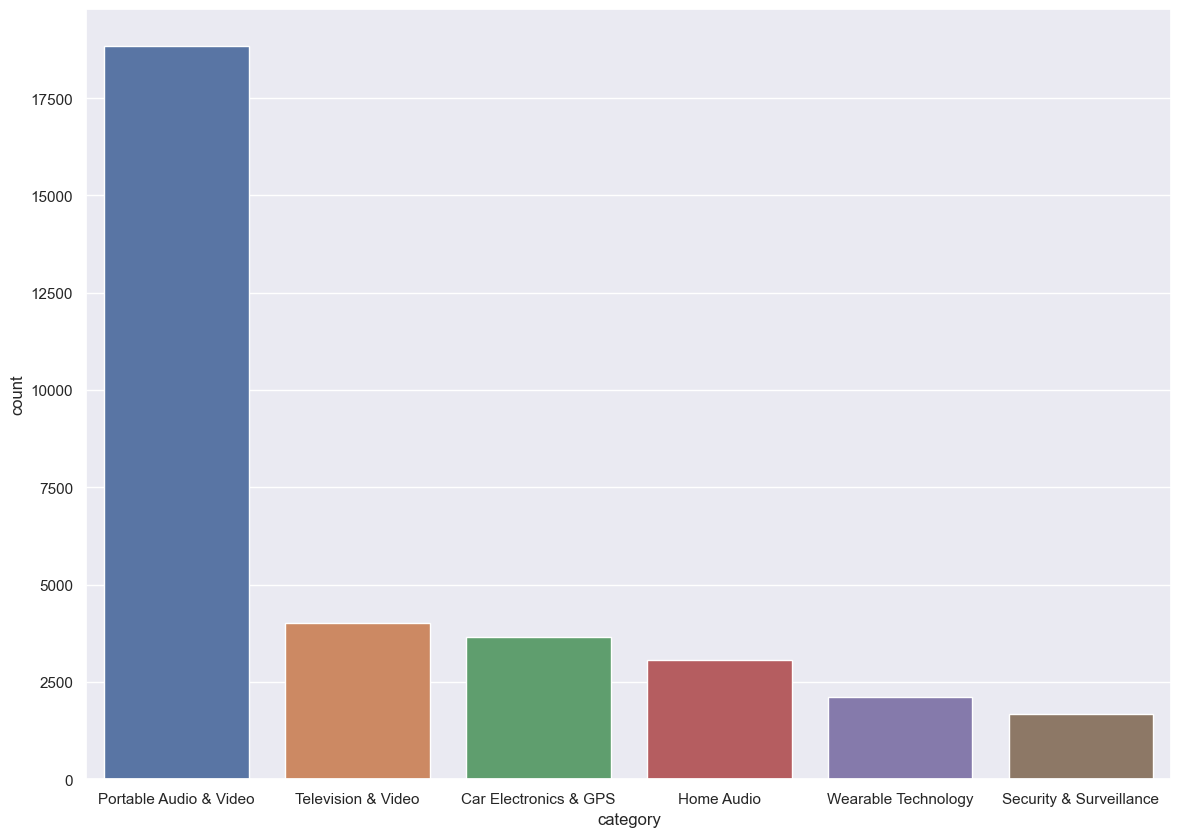

In [52]:
# Category with the least sales

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-6:].index)


In [53]:
#security &Surveillance has least sale 

<Axes: xlabel='year'>

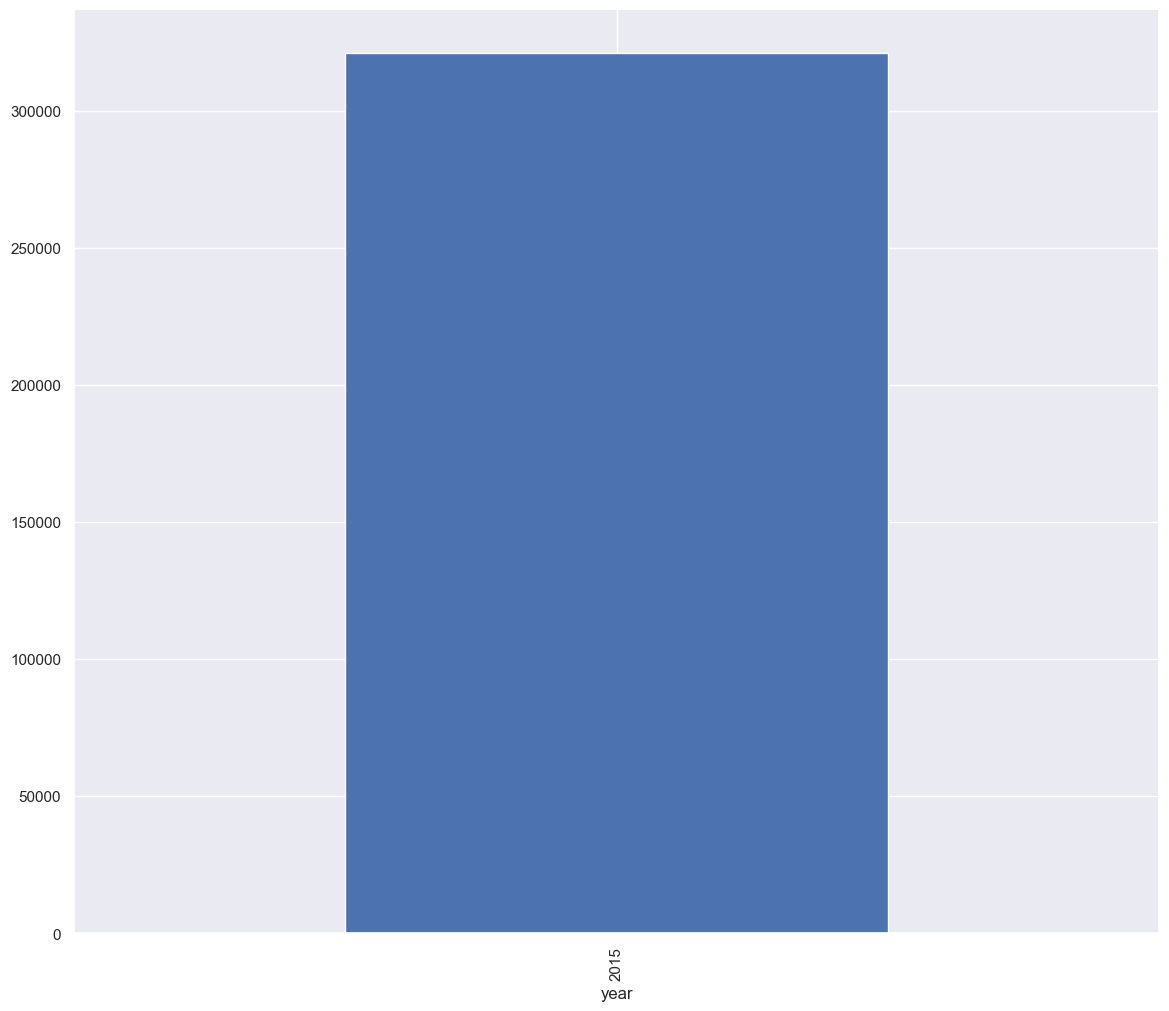

In [25]:
#How much was made in sales in the year 2015
dataset[dataset['year']==2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

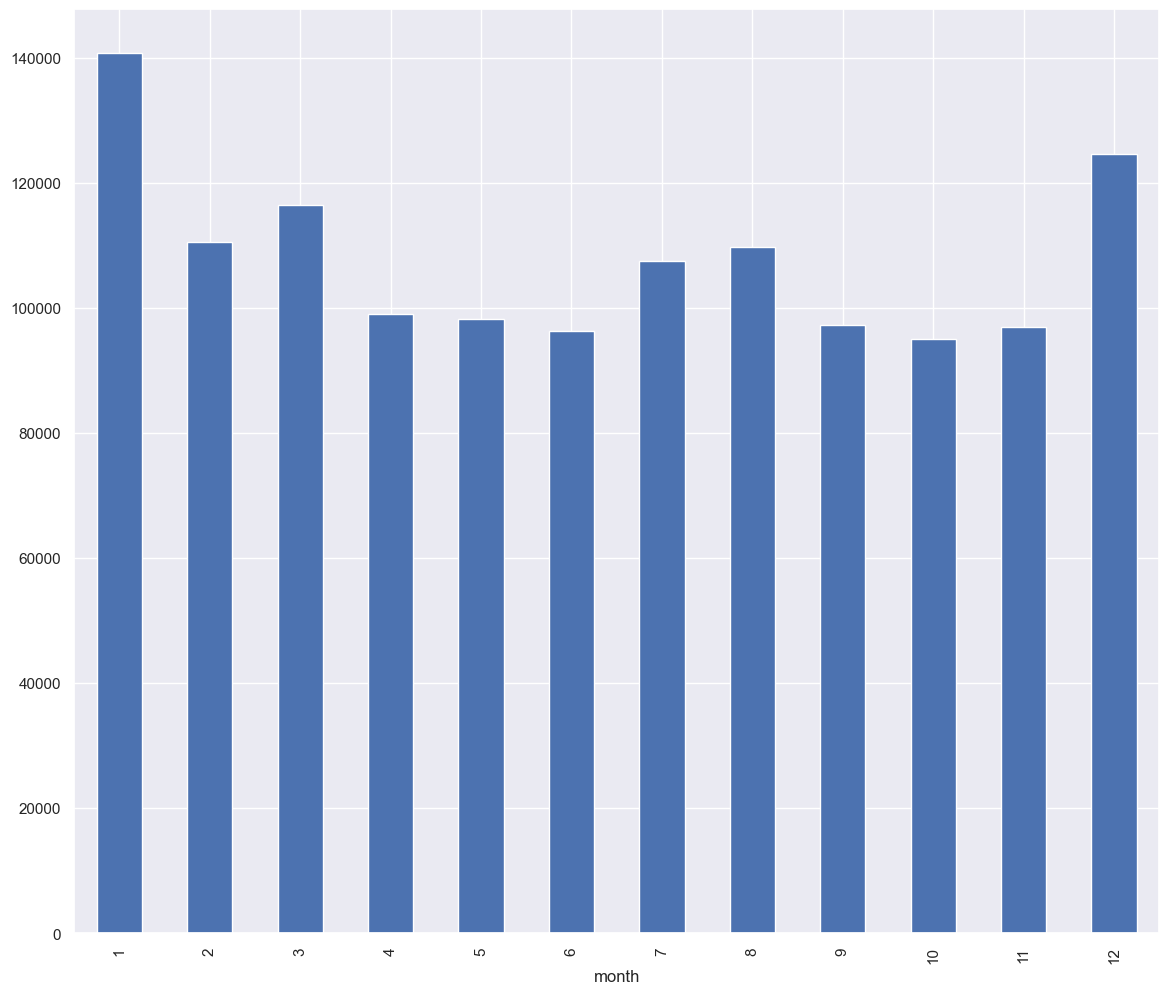

In [26]:
#best month 
dataset['month']=pd.DatetimeIndex(dataset['timestamp']).month
dataset.groupby('month')['rating'].count().plot(kind='bar')

In [ ]:
#from this graph,we can clearly see that , January had the best for sales .

<Axes: xlabel='category'>

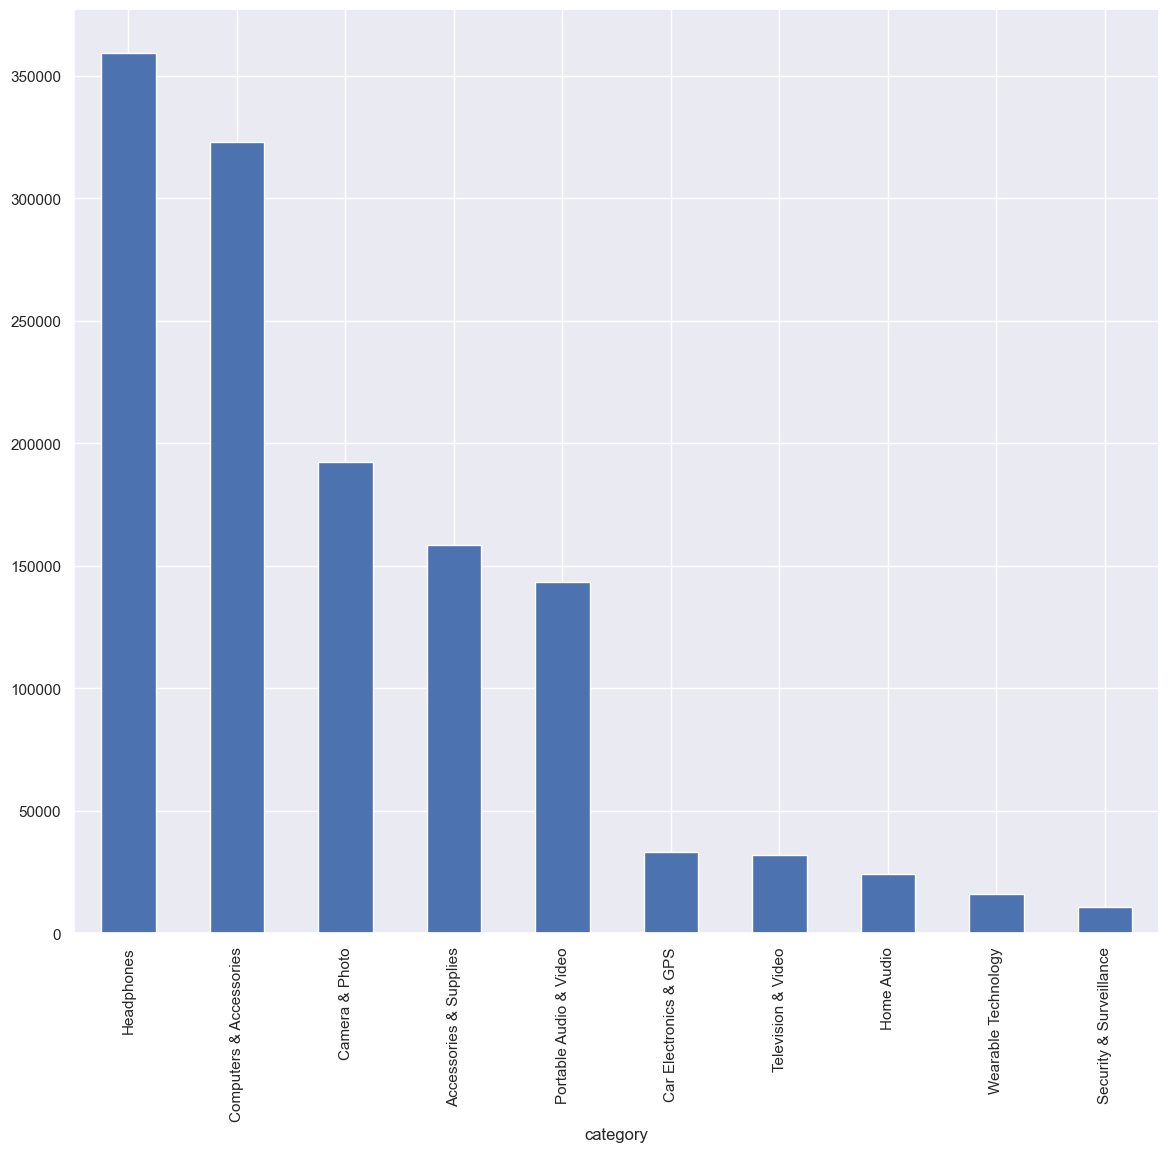

In [27]:
#what product by category sold the most ?
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
#from the above graph , we can see that , Headphones sold the most 

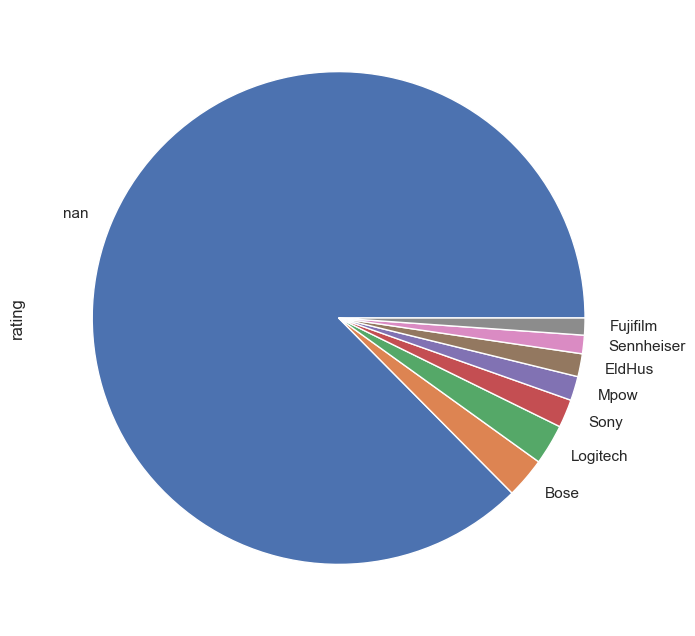

In [32]:
# brand percentage sales

dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(8).plot(kind='pie')
sns.set(rc={'figure.figsize':(4,8)})

In [ ]:
#according to the analysis ,the brand name of NaN had the most sales 

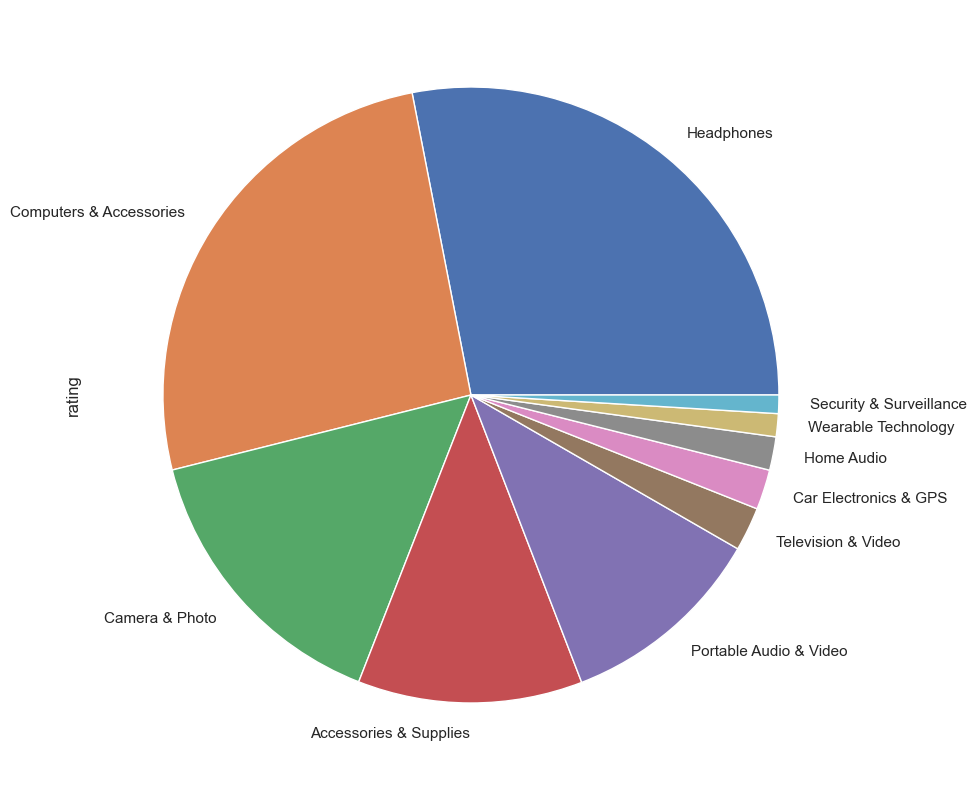

In [55]:
#distribution of sales presented in a pie chart 
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

#background colour 
sns.set_style('dark')

In [1]:
# conclusion of our analysis

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

#NaN brand had the most sales 

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.

